# Simulado: Prova 2 / CDados 2s2022

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Rubrica
Em cada questão, alguns desses elementos se aplicam:

| Elemento | Insuficiente | Suficiente | Proficiente | Avançado |
| --- | --- | --- | --- | --- |
| 1 | Os elementos de programação estão ausentes ou errados | O código gera resultado correto, embora tenha problemas na clareza ou não use estruturas relevantes como laços e nomes de variáveis fáceis de identificar | O código está claro e correto | O código está claro, funcional e bem comentado |
| 2 | As informações não são escolhidas corretamente | As informações corretas são escolhidas, mas são apresentadas junto a várias outras informações irrelevantes | As informações corretas são escolhidas, e as irrelevantes são deixadas de lado | As informações corretas são escolhidas e justificadas |
| 3 | Não há relação entre afirmações e medidas estatísticas | As medidas estatísticas são marginalmente relacionadas às afirmações | As medidas estatísticas são claramente relacionadas às afirmações | As medidas estatísticas são relacionadas às afirmações, e as respostas apontam as limitações dessas relações |
| 4 | Não há figuras ou textos, ou eles estão factualmente errados | As figuras ou textos são prolixos ou pouco claros, embora tragam informações que apontem na direção da resposta correta | As figuras e textos são objetivos, claros e corretos | As figuras e textos são auto-suficientes, isto é, são tão claros que podem ser entendidos sem conhecer o enunciado da questão |

# Exercício 1

Neste simulado, vamos trabalhar com dados de doenças cardíacas. Eles estão no seguinte dataframe:

In [8]:
df = pd.read_csv('heart_2020_dirty.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Tipicamente, o Body Mass Index é interpretado como um número que informa se uma pessoa é magra, média, tem sobrepeso ou tem obesidade, usando a seguinte tabela:

* Below 18.5	Underweight
* 18.5 – 24.9	Healthy Weight
* 25.0 – 29.9	Overweight
* 30.0 and Above	Obesity

(a) Verifique como encontrar os dados de Body Mass Index (BMI) em nosso dataframe. Se necessário, realize a limpeza dos dados.

(b) Calcule a média e a variância *amostrais* desses dados

(c) Se uma pessoa aleatória for sorteada nesses dados, qual é a probabilidade de ela ter o BMI médio, isto é, entre 18.5 e 24.9?

(d) Se sorteamos 50 pessoas nos dados, qual é a probabilidade de pelo menos 20 delas terem BMI médio? Que distribuição deve ser usada para isso, e quais os seus parâmetros?

(e) Se sorteamos 50 pessoas aleatórias em nosso dataset, quantas pessoas, em média, terão BMI médio?  Que distribuição deve ser usada para isso, e quais os seus parâmetros?

(f) Se sortearmos pessoas uma a uma em nosso dataset, após quantas pessoas deveremos encontrar uma pessoa com BMI médio?  Que distribuição deve ser usada para isso, e quais os seus parâmetros?

In [22]:
#a)
df['BMI'].head()

#b)
bodymass = df['BMI']
a=bodymass.mean()
b=bodymass.var()
print(a,b)

#c)
h = df[df['BMI'] > 18.4]
health = h[h['BMI'] < 24.9]
health_mean = len(health)/len(df)
print(health_mean)

#d) Binomial: Qnt de eventos, tamanho da amostra, probabilidade de ocorrer
print(stats.binom.cdf(20,50,health_mean))

#e)
print(stats.binom.pmf(n=50, q=health_mean))

28.3254038224607 40.400127101907685
0.298047186478838
0.9552603287379806


TypeError: _parse_args() missing 1 required positional argument: 'p'

# Exercício 2

O senso comum nos diz que pessoas que fumam e bebem tendem a ter o BMI maior que aquelas que não fumam nem bebem. Verificaremos se isso se aplica ao nosso dataset.

Use um histograma para avaliar a distribuição de BMI entre indivíduos que fumam e bebem e, simultaneamente, em indivíduos que não fumam nem bebem.


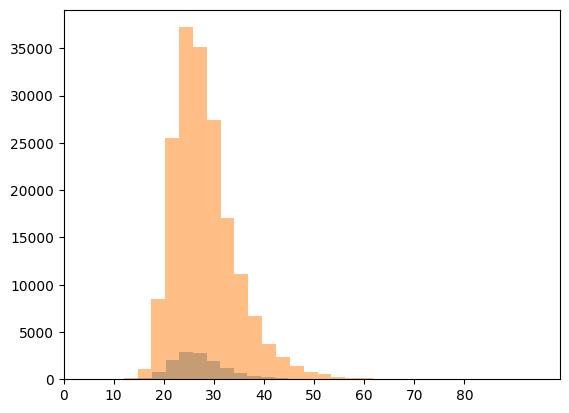

In [47]:
a = df[df['AlcoholDrinking'] == 'Yes']
feb = a[a['Smoking'] == 'Yes']

b = df[df['AlcoholDrinking'] == 'No']
clean = b[b['Smoking'] == 'No']
plt.figure()
#feb['BMI'].plot(kind='hist', bins=30, alpha=0.5)
#feb['BMI'].plot(kind='kde')

plt.hist(feb['BMI'], bins=30, alpha=0.5)
plt.hist(clean['BMI'], bins=30, alpha=0.5)
plt.xticks(list(range(0,81,10)))
plt.show()

# Exercício 3

Usando um método de inferência estatística, verifique se a média de BMI dos indivíduos que praticam esportes é diferente da média de BMI dos indivíduos que não praticam esportes. Justifique sua resposta com suas palavras, num texto que use, obrigatoriamente, os conceitos de hipótese nula, p-valor, teste estatístico e nível de significância $\alpha$. Se precisar, assuma valores razoáveis para constantes.

In [59]:
# Hipotese Nula: BMI medio de esportistas == ao de sedentarios
# HNula descartada para alpha: 5% 

esp = df[df['PhysicalActivity'] == 'Yes']
sed = df[df['PhysicalActivity'] == 'No']

t,p = stats.ttest_ind(list(esp['BMI']), list(sed['BMI']))
print(t,p)


nan nan


# Exercício 4

De acordo com os dados que levantamos ao longo de toda esta atividade, a prática de atividade física pode ser usada como intervenção única para que uma pessoa com obesidade possa voltar ao peso normal, ou é essencial que ela esteja ligada a outras intervenções? Justifique sua resposta evidenciando todos os dados que foram usados e quais raciocínios devemos usar para sustentar essa conclusão.